In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import warnings
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
seed_constant = 42
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_classes_names = os.listdir('/content/drive/MyDrive/Train')
all_classes_names

['Ak', 'Nazli', 'Dimnit', 'Buzgulu', 'Ala_Idris']

In [ ]:
AK_path = '/content/drive/MyDrive/Train/Ak'
Ala_path = '/content/drive/MyDrive/Train/Ala_Idris'
buzgulu_path = '/content/drive/MyDrive/Train/Ala_Idris'
dimnit_path = '/content/drive/MyDrive/Train/Dimnit'
nazli_path = '/content/drive/MyDrive/Train/Nazli'



AK_files = os.listdir(AK_path)
Ala_files = os.listdir(Ala_path)
buzgulu_files = os.listdir(buzgulu_path)
dimnit_files = os.listdir(dimnit_path)
nazli_files = os.listdir(nazli_path)



print("length of AK:", len(AK_files))
print("length of Ala:", len(Ala_files))
print("length of buzhulu :", len(buzgulu_files))
print("length of dimnit:", len(dimnit_files))
print("length of nazli:", len(nazli_files))

length of AK: 70
length of Ala: 70
length of buzhulu : 70
length of dimnit: 70
length of nazli: 70


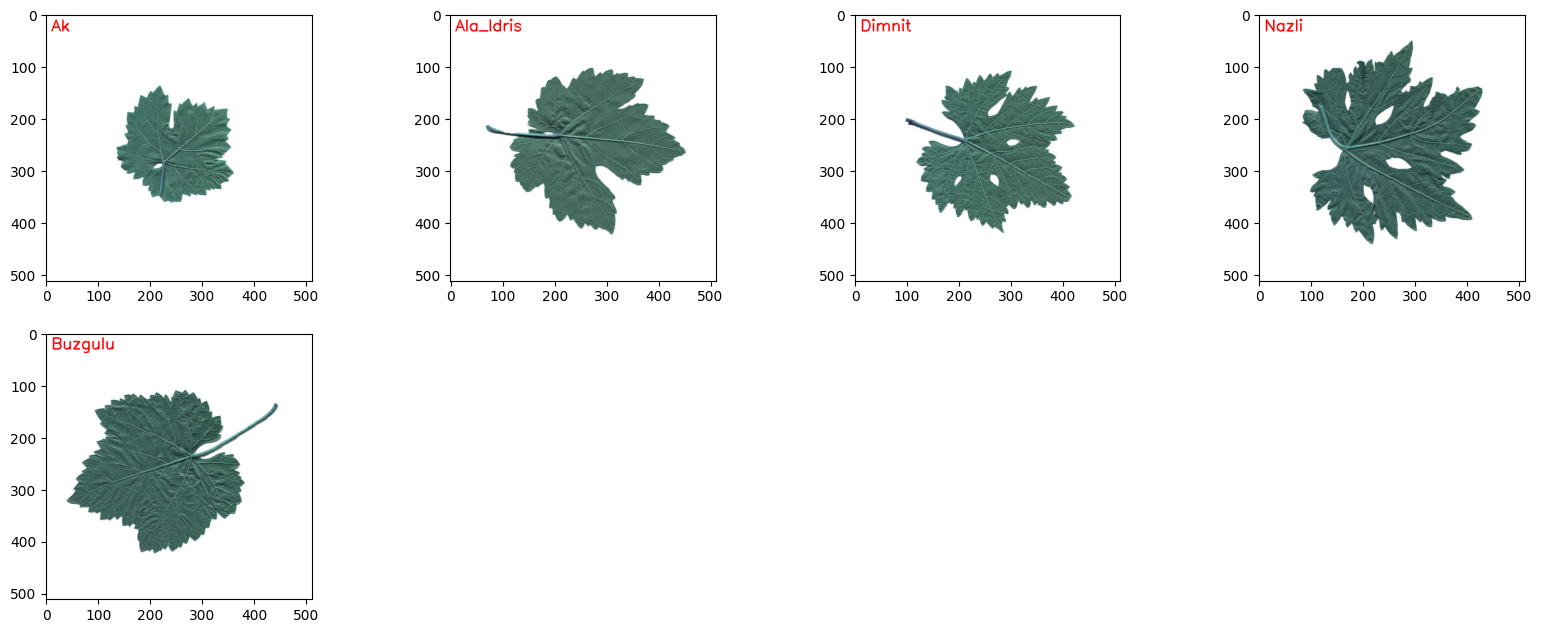

In [ ]:
plt.figure(figsize = (20,20))

random_range = random.sample(range(len(all_classes_names)), 5)

for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'/content/drive/MyDrive/Train/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'/content/drive/MyDrive/Train/{selected_class_Name}/{selected_video_file_name}')

    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object.
    video_reader.release()

    # Convert the frame from BGR into RGB format.
    # rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(bgr_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(bgr_frame);plt.axis('on')

In [ ]:
IMAGE_HEIGHT , IMAGE_WIDTH = 400,400

DATASET_DIR = "/content/drive/MyDrive/Train"

CLASSES_LIST = ['Ak','Ala_Idris','Buzgulu','Dimnit','Nazli']

In [ ]:
generator1=ImageDataGenerator(zoom_range=[0.6, 0.7])
generator2=ImageDataGenerator(zoom_range=[0.9, 1.0])


def create_dataset(class_name,class_index):
    '''
    This function will extract the data of the selected classes and create the
    required dataset.
    Returns:
        features:          A list containing the extracted images.
        labels:            A list containing the indexes of the classes associated with the images.
    '''

    features = []
    labels = []


    files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
    i=0
    for file_name in files_list:

      img = os.path.join(DATASET_DIR, class_name, file_name)
      img=cv2.imread(img)


      white_pixels = (img[:, :, 0] > 250) & (img[:, :, 1] > 250) & (img[:, :, 2] > 250)
      percentage=np.sum(white_pixels)/(img.shape[0]*img.shape[1])*100


      if percentage >= 80:
         img=generator1.random_transform(img)
      else :
         img=generator2.random_transform(img)


      img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))

      img = img/255.0

      features.append(img)

      labels.append(class_index)
      i+=1
    print(f"Number of data in class {class_name} = ",i)

    features = np.array(features)
    labels = np.array(labels)

    return features, labels

In [ ]:
features_Ak, labels__Ak = create_dataset('Ak',0)
features_Ala_Idris, labels_Ala_Idris = create_dataset('Ala_Idris',1)
features_Buzgulu, labels_Buzgulu = create_dataset('Buzgulu',2)
features_Dimnit, labels_Dimnit = create_dataset('Dimnit',3)
features_Nazli, labels_Nazli = create_dataset('Nazli',4)

Number of data in class Ak =  70
Number of data in class Ala_Idris =  70
Number of data in class Buzgulu =  70
Number of data in class Dimnit =  70
Number of data in class Nazli =  70


In [ ]:
features_Ak.shape,labels__Ak.shape

((70, 400, 400, 3), (70,))

In [ ]:
features_Ala_Idris.shape,labels_Ala_Idris.shape

((70, 400, 400, 3), (70,))

In [ ]:
features_Buzgulu.shape,labels_Buzgulu.shape

((70, 400, 400, 3), (70,))

In [ ]:
features_Dimnit.shape,labels_Dimnit.shape

((70, 400, 400, 3), (70,))

In [ ]:
features_Nazli.shape,labels_Nazli.shape

((70, 400, 400, 3), (70,))

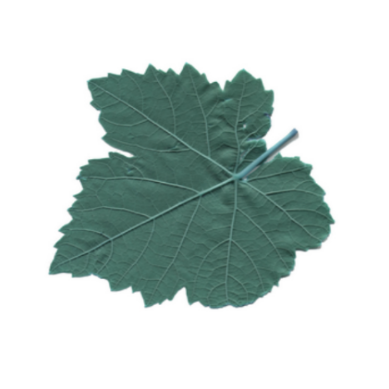

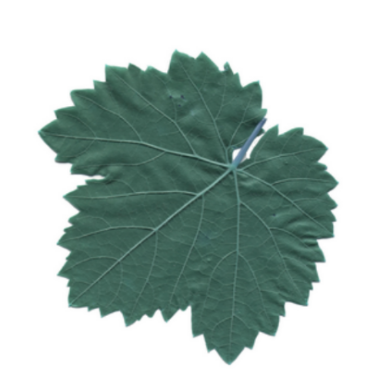

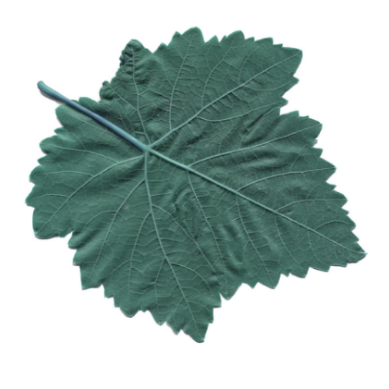

In [ ]:
for i in range(3):

  plt.imshow(features_Ak[i,:,:,:])
  plt.axis('off')
  plt.show()

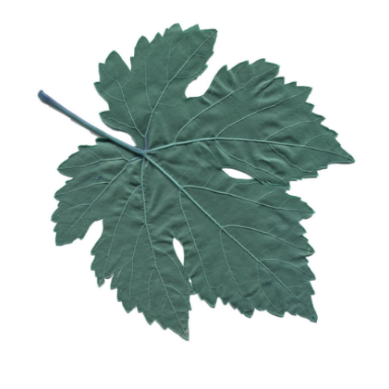

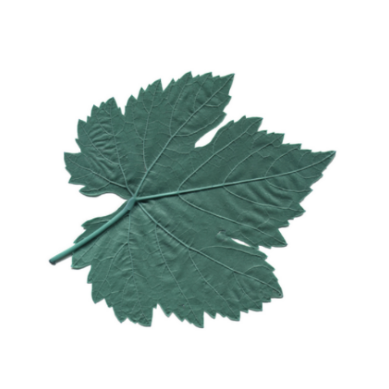

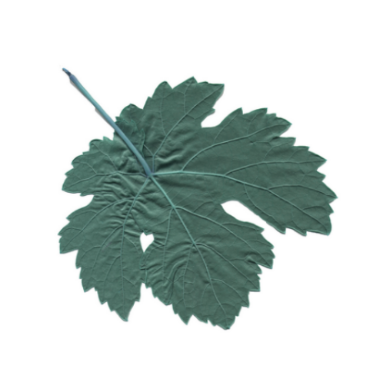

In [ ]:
for i in range(3):

  plt.imshow(features_Ala_Idris[i,:,:,:])
  plt.axis('off')
  plt.show()

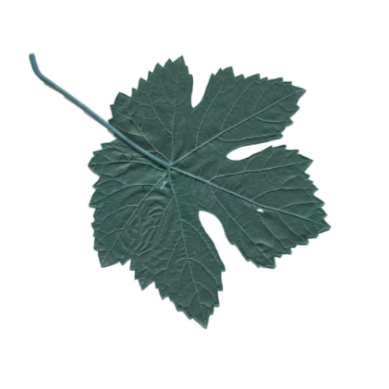

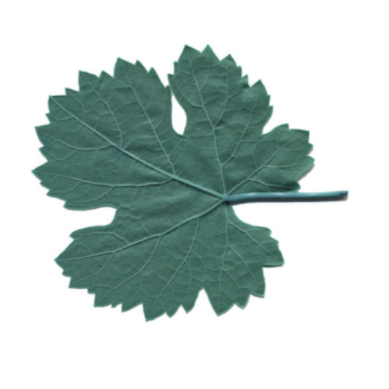

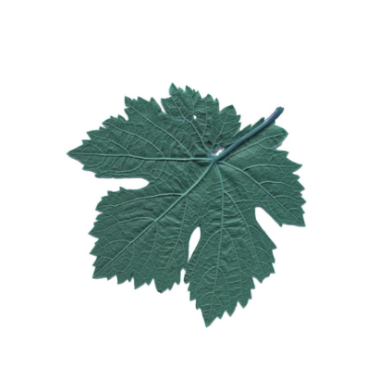

In [ ]:
for i in range(3):

  plt.imshow(features_Buzgulu[i,:,:,:])
  plt.axis('off')
  plt.show()

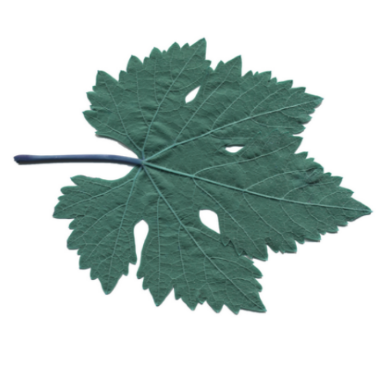

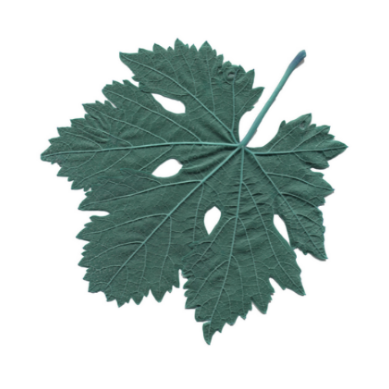

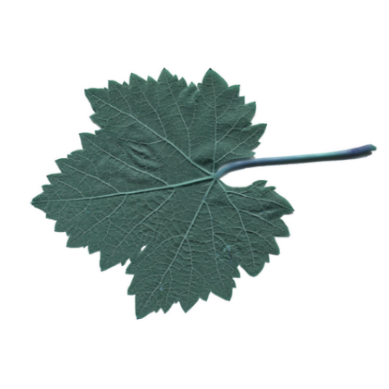

In [ ]:
for i in range(3):

  plt.imshow(features_Dimnit[i,:,:,:])
  plt.axis('off')
  plt.show()

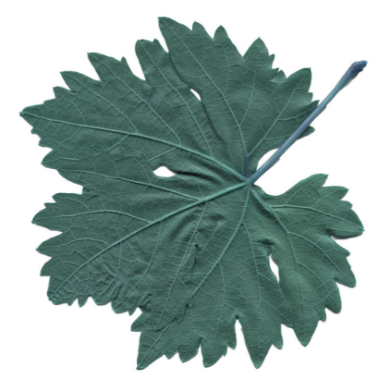

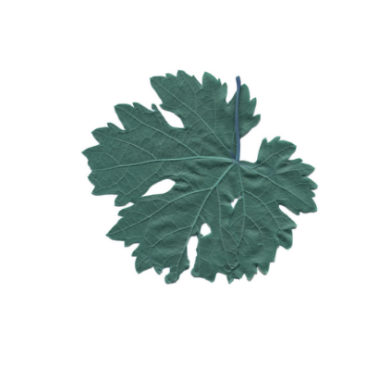

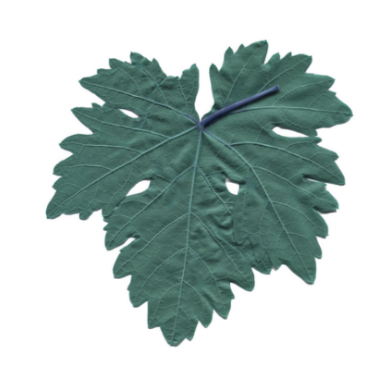

In [ ]:
for i in range(3):

  plt.imshow(features_Nazli[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:

generator=ImageDataGenerator(
    rotation_range=130,
    horizontal_flip=True,
    vertical_flip=True,

    )


In [ ]:
augmented_img_list = []
for img in features_Nazli:

  augmented_img = generator.random_transform(img)
  features_Nazli=np.append(features_Nazli,augmented_img)

features_Nazli = np.reshape(features_Nazli, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))

In [ ]:
features_Nazli.shape

(140, 400, 400, 3)

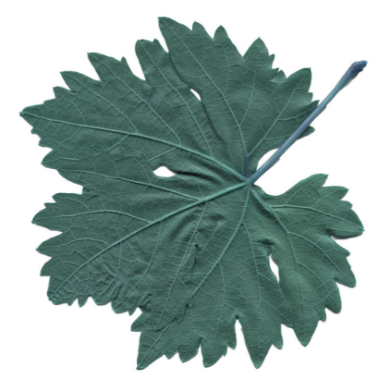

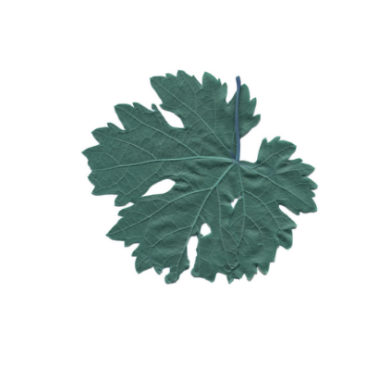

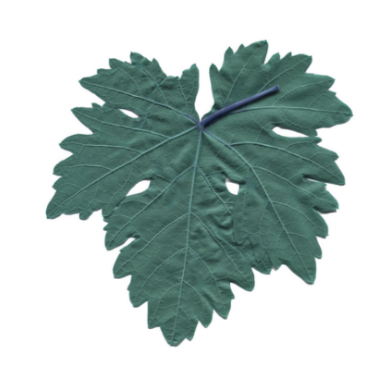

In [ ]:
for i in range(3):

  plt.imshow(features_Nazli[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:
features_Ak, labels__Ak
features_Ala_Idris, labels_Ala_Idris
features_Buzgulu, labels_Buzgulu
features_Dimnit, labels_Dimnit
features_Nazli, labels_Nazli

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [ ]:
# Duplicate labels to match the augmented images
augmented_labels_Nazli = np.repeat(labels_Nazli, 2, axis=0)

# Verify the shape of augmented_labels_Ak
print(augmented_labels_Nazli.shape)


(140,)


In [ ]:
for img in features_Ak:

  augmented_img = generator.random_transform(img)
  features_Ak = np.append(features_Ak,augmented_img)

features_Ak = np.reshape(features_Ak, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))


In [ ]:
features_Ak.shape

(140, 400, 400, 3)

In [ ]:
# Duplicate labels to match the augmented images
augmented_labels_Ak = np.repeat(labels__Ak, 2, axis=0)

# Verify the shape of augmented_labels_Ak
print(augmented_labels_Ak.shape)


(140,)


In [ ]:
for img in features_Ala_Idris:

  augmented_img = generator.random_transform(img)
  features_Ala_Idris = np.append(features_Ala_Idris,augmented_img)

features_Ala_Idris = np.reshape(features_Ala_Idris, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))

In [ ]:
# Duplicate labels to match the augmented images
augmented_labels_Ala_Idris = np.repeat(labels_Ala_Idris, 2, axis=0)

# Verify the shape of augmented_labels_Ak
print(augmented_labels_Ala_Idris.shape)


(140,)


In [ ]:
for img in features_Buzgulu:

  augmented_img = generator.random_transform(img)
  features_Buzgulu = np.append(features_Buzgulu,augmented_img)

features_Buzgulu = np.reshape(features_Buzgulu, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))

In [ ]:
# Duplicate labels to match the augmented images
augmented_labels_Buzgulu = np.repeat(labels_Buzgulu, 2, axis=0)

# Verify the shape of augmented_labels_Ak
print(augmented_labels_Buzgulu.shape)

(140,)


In [ ]:
for img in features_Dimnit:

  augmented_img = generator.random_transform(img)
  features_Dimnit = np.append(features_Dimnit,augmented_img)

features_Dimnit = np.reshape(features_Dimnit, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))

In [ ]:
# Duplicate labels to match the augmented images
augmented_labels_Dimnit = np.repeat(labels_Dimnit, 2, axis=0)

# Verify the shape of augmented_labels_Ak
print(augmented_labels_Dimnit.shape)

(140,)


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense , Activation , Conv2D , MaxPool2D , Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Combine features and labels for each dataset
combined_features = np.concatenate((features_Ak, features_Ala_Idris, features_Buzgulu, features_Dimnit, features_Nazli), axis=0)
combined_labels = np.concatenate((augmented_labels_Ak, augmented_labels_Ala_Idris, augmented_labels_Buzgulu, augmented_labels_Dimnit, augmented_labels_Nazli), axis=0)
combined_features.shape

(700, 400, 400, 3)

In [ ]:
combined_labels.shape

(700,)

In [ ]:
del features_Ak, features_Ala_Idris, features_Buzgulu, features_Dimnit, features_Nazli

print("Shape of combined features after deletion:", combined_features.shape)

Shape of combined features after deletion: (700, 400, 400, 3)


In [ ]:
del augmented_labels_Ak, augmented_labels_Ala_Idris, augmented_labels_Buzgulu, augmented_labels_Dimnit, augmented_labels_Nazli

print("Shape of combined labels after deletion:", combined_labels.shape)

Shape of combined labels after deletion: (700,)


In [ ]:
reshaped_labels = combined_labels.reshape(-1, 1)

print(reshaped_labels.shape)

(700, 1)


In [ ]:
from keras.utils import to_categorical

one_hot_labels = to_categorical(reshaped_labels)

print(one_hot_labels.shape)


(700, 5)


In [ ]:
# -*- coding: utf-8 -*-
"""Inception-ResNet V2 model for Keras.

Model naming and structure follows TF-slim implementation (which has some additional
layers and different number of filters from the original arXiv paper):
https://github.com/tensorflow/models/blob/master/slim/nets/inception_resnet_v2.py

Pre-trained ImageNet weights are also converted from TF-slim, which can be found in:
https://github.com/tensorflow/models/tree/master/slim#pre-trained-models

# Reference
- [Inception-v4, Inception-ResNet and the Impact of
   Residual Connections on Learning](https://arxiv.org/abs/1602.07261)

"""
from __future__ import print_function
from __future__ import absolute_import

import warnings
import numpy as np

from keras.models import Model
from keras import layers
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.utils import get_source_inputs
from tensorflow.keras.utils import get_file
from keras import backend as K
from keras.preprocessing import image


BASE_WEIGHT_URL = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.7/'

def conv2d_bn(x,
              filters,
              kernel_size,
              strides=1,
              padding='same',
              activation='relu',
              use_bias=False,
              name=None):
    """Utility function to apply conv + BN.

    # Arguments
        x: input tensor.
        filters: filters in `Conv2D`.
        kernel_size: kernel size as in `Conv2D`.
        padding: padding mode in `Conv2D`.
        activation: activation in `Conv2D`.
        strides: strides in `Conv2D`.
        name: name of the ops; will become `name + '_ac'` for the activation
            and `name + '_bn'` for the batch norm layer.

    # Returns
        Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    x = Conv2D(filters,
               kernel_size,
               strides=strides,
               padding=padding,
               use_bias=use_bias,
               name=name)(x)
    if not use_bias:
        bn_axis = 1 if K.image_data_format() == 'channels_first' else 3
        bn_name = None if name is None else name + '_bn'
        x = BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    if activation is not None:
        ac_name = None if name is None else name + '_ac'
        x = Activation(activation, name=ac_name)(x)
    return x


def inception_resnet_block(x, scale, block_type, block_idx, activation='relu'):
    """Adds a Inception-ResNet block.

    This function builds 3 types of Inception-ResNet blocks mentioned
    in the paper, controlled by the `block_type` argument (which is the
    block name used in the official TF-slim implementation):
        - Inception-ResNet-A: `block_type='block35'`
        - Inception-ResNet-B: `block_type='block17'`
        - Inception-ResNet-C: `block_type='block8'`

    # Arguments
        x: input tensor.
        scale: scaling factor to scale the residuals (i.e., the output of
            passing `x` through an inception module) before adding them
            to the shortcut branch. Let `r` be the output from the residual branch,
            the output of this block will be `x + scale * r`.
        block_type: `'block35'`, `'block17'` or `'block8'`, determines
            the network structure in the residual branch.
        block_idx: an `int` used for generating layer names. The Inception-ResNet blocks
            are repeated many times in this network. We use `block_idx` to identify
            each of the repetitions. For example, the first Inception-ResNet-A block
            will have `block_type='block35', block_idx=0`, ane the layer names will have
            a common prefix `'block35_0'`.
        activation: activation function to use at the end of the block
            (see [activations](keras./activations.md)).
            When `activation=None`, no activation is applied
            (i.e., "linear" activation: `a(x) = x`).

    # Returns
        Output tensor for the block.

    # Raises
        ValueError: if `block_type` is not one of `'block35'`,
            `'block17'` or `'block8'`.
    """
    if block_type == 'block35':
        branch_0 = conv2d_bn(x, 32, 1)
        branch_1 = conv2d_bn(x, 32, 1)
        branch_1 = conv2d_bn(branch_1, 32, 3)
        branch_2 = conv2d_bn(x, 32, 1)
        branch_2 = conv2d_bn(branch_2, 48, 3)
        branch_2 = conv2d_bn(branch_2, 64, 3)
        branches = [branch_0, branch_1, branch_2]
    elif block_type == 'block17':
        branch_0 = conv2d_bn(x, 192, 1)
        branch_1 = conv2d_bn(x, 128, 1)
        branch_1 = conv2d_bn(branch_1, 160, [1, 7])
        branch_1 = conv2d_bn(branch_1, 192, [7, 1])
        branches = [branch_0, branch_1]
    elif block_type == 'block8':
        branch_0 = conv2d_bn(x, 192, 1)
        branch_1 = conv2d_bn(x, 192, 1)
        branch_1 = conv2d_bn(branch_1, 224, [1, 3])
        branch_1 = conv2d_bn(branch_1, 256, [3, 1])
        branches = [branch_0, branch_1]
    else:
        raise ValueError('Unknown Inception-ResNet block type. '
                         'Expects "block35", "block17" or "block8", '
                         'but got: ' + str(block_type))

    block_name = block_type + '_' + str(block_idx)
    channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
    mixed = Concatenate(axis=channel_axis, name=block_name + '_mixed')(branches)
    up = conv2d_bn(mixed,
                   K.int_shape(x)[channel_axis],
                   1,
                   activation=None,
                   use_bias=True,
                   name=block_name + '_conv')

    x = Lambda(lambda inputs, scale: inputs[0] + inputs[1] * scale,
               output_shape=K.int_shape(x)[1:],
               arguments={'scale': scale},
               name=block_name)([x, up])
    if activation is not None:
        x = Activation(activation, name=block_name + '_ac')(x)
    return x


def InceptionResNetV2(include_top=True,
                      weights='imagenet',
                      input_tensor=None,
                      input_shape=None,
                      pooling=None,
                      classes=1000):
    """Instantiates the Inception-ResNet v2 architecture.

    Optionally loads weights pre-trained on ImageNet.
    Note that when using TensorFlow, for best performance you should
    set `"image_data_format": "channels_last"` in your Keras config
    at `~/.keras/keras.json`.

    The model and the weights are compatible with both TensorFlow and Theano
    backends (but not CNTK). The data format convention used by the model is
    the one specified in your Keras config file.

    Note that the default input image size for this model is 299x299, instead
    of 224x224 as in the VGG16 and ResNet models. Also, the input preprocessing
    function is different (i.e., do not use `imagenet_utils.preprocess_input()`
    with this model. Use `preprocess_input()` defined in this module instead).

    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization)
            or `'imagenet'` (pre-training on ImageNet).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is `False` (otherwise the input shape
            has to be `(299, 299, 3)` (with `'channels_last'` data format)
            or `(3, 299, 299)` (with `'channels_first'` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 139.
            E.g. `(150, 150, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the last convolutional layer.
            - `'avg'` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `'max'` means that global max pooling will be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is `True`, and
            if no `weights` argument is specified.

    # Returns
        A Keras `Model` instance.

    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
        RuntimeError: If attempting to run this model with an unsupported backend.
    """
    if K.backend() in {'cntk'}:
        raise RuntimeError(K.backend() + ' backend is currently unsupported for this model.')

    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')


    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    # Stem block: 35 x 35 x 192
    x = conv2d_bn(img_input, 32, 3, strides=2, padding='valid')
    x = conv2d_bn(x, 32, 3, padding='valid')
    x = conv2d_bn(x, 64, 3)
    x = MaxPooling2D(3, strides=2)(x)
    x = conv2d_bn(x, 80, 1, padding='valid')
    x = conv2d_bn(x, 192, 3, padding='valid')
    x = MaxPooling2D(3, strides=2)(x)

    # Mixed 5b (Inception-A block): 35 x 35 x 320
    branch_0 = conv2d_bn(x, 96, 1)
    branch_1 = conv2d_bn(x, 48, 1)
    branch_1 = conv2d_bn(branch_1, 64, 5)
    branch_2 = conv2d_bn(x, 64, 1)
    branch_2 = conv2d_bn(branch_2, 96, 3)
    branch_2 = conv2d_bn(branch_2, 96, 3)
    branch_pool = AveragePooling2D(3, strides=1, padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
    x = Concatenate(axis=channel_axis, name='mixed_5b')(branches)

    # 10x block35 (Inception-ResNet-A block): 35 x 35 x 320
    for block_idx in range(1, 11):
        x = inception_resnet_block(x,
                                   scale=0.17,
                                   block_type='block35',
                                   block_idx=block_idx)

    # Mixed 6a (Reduction-A block): 17 x 17 x 1088
    branch_0 = conv2d_bn(x, 384, 3, strides=2, padding='valid')
    branch_1 = conv2d_bn(x, 256, 1)
    branch_1 = conv2d_bn(branch_1, 256, 3)
    branch_1 = conv2d_bn(branch_1, 384, 3, strides=2, padding='valid')
    branch_pool = MaxPooling2D(3, strides=2, padding='valid')(x)
    branches = [branch_0, branch_1, branch_pool]
    x = Concatenate(axis=channel_axis, name='mixed_6a')(branches)

    # 20x block17 (Inception-ResNet-B block): 17 x 17 x 1088
    for block_idx in range(1, 21):
        x = inception_resnet_block(x,
                                   scale=0.1,
                                   block_type='block17',
                                   block_idx=block_idx)

    # Mixed 7a (Reduction-B block): 8 x 8 x 2080
    branch_0 = conv2d_bn(x, 256, 1)
    branch_0 = conv2d_bn(branch_0, 384, 3, strides=2, padding='valid')
    branch_1 = conv2d_bn(x, 256, 1)
    branch_1 = conv2d_bn(branch_1, 288, 3, strides=2, padding='valid')
    branch_2 = conv2d_bn(x, 256, 1)
    branch_2 = conv2d_bn(branch_2, 288, 3)
    branch_2 = conv2d_bn(branch_2, 320, 3, strides=2, padding='valid')
    branch_pool = MaxPooling2D(3, strides=2, padding='valid')(x)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    x = Concatenate(axis=channel_axis, name='mixed_7a')(branches)

    # 10x block8 (Inception-ResNet-C block): 8 x 8 x 2080
    for block_idx in range(1, 10):
        x = inception_resnet_block(x,
                                   scale=0.2,
                                   block_type='block8',
                                   block_idx=block_idx)
    x = inception_resnet_block(x,
                               scale=1.,
                               activation=None,
                               block_type='block8',
                               block_idx=10)

    # Final convolution block: 8 x 8 x 1536
    x = conv2d_bn(x, 1536, 1, name='conv_7b')

    if include_top:
        # Classification block
        x = GlobalAveragePooling2D(name='avg_pool')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    # Create model
    model = Model(inputs, x, name='inception_resnet_v2')

    # Load weights
    if weights == 'imagenet':
        if K.image_data_format() == 'channels_first':
            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
        if include_top:
            weights_filename = 'inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5'
            weights_path = get_file(weights_filename,
                                    BASE_WEIGHT_URL + weights_filename,
                                    cache_subdir='models',
                                    md5_hash='e693bd0210a403b3192acc6073ad2e96')
        else:
            weights_filename = 'inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5'
            weights_path = get_file(weights_filename,
                                    BASE_WEIGHT_URL + weights_filename,
                                    cache_subdir='models',
                                    md5_hash='d19885ff4a710c122648d3b5c3b684e4')
        model.load_weights(weights_path)

    return model


In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization

base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(400, 400, 3), pooling='avg')

x = base_model.output
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

main_output = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=[main_output])


for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


X_train, X_val, y_train, y_val = train_test_split(combined_features, one_hot_labels, test_size=0.2, random_state=42)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(
    X_train, y_train, batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr, checkpoint, early_stopping]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1.5959 - accuracy: 0.4536
Epoch 1: val_loss improved from inf to 1.25195, saving model to best_model.h5
18/18 [==============================] - 61s 2s/step - loss: 1.5959 - accuracy: 0.4536 - val_loss: 1.2519 - val_accuracy: 0.4786 - lr: 0.0010
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 0.9804 - accuracy: 0.6625
Epoch 2: val_loss did not improve from 1.25195
18/18 [==============================] - 15s 868ms/step - loss: 0.9804 - accuracy: 0.6625 - val_loss: 1.6392 - val_accuracy: 0.3214 - lr: 0.0010
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 0.7424 - accuracy: 0.7482
Epoch 3: val_loss did not improve from 1.25195
18/18 [==============================] - 16s 881ms/step - loss: 0.7424 - accuracy: 0.7482 - val_loss: 1.7431 - val_accuracy: 0.3571 - lr: 0.0010
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 0.5887 - accuracy: 0.7929
Epoch 4: val_los

In [ ]:
from keras.models import load_model
model = load_model('best_model.h5')

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/Test"


In [ ]:
generator1=ImageDataGenerator(zoom_range=[0.6, 0.7])
generator2=ImageDataGenerator(zoom_range=[0.9, 1.0])

def create_testset():
    '''
    This function will extract the data of the selected classes and create the
    required dataset.
    Returns:
        features:          A list containing the extracted images.
        labels:            A list containing the indexes of the classes associated with the images.
    '''

    features = []


    files_list = os.listdir(DATASET_DIR)
    i=0
    for file_name in files_list:

      img = os.path.join(DATASET_DIR,file_name)
      img=cv2.imread(img)

      white_pixels = (img[:, :, 0] > 250) & (img[:, :, 1] > 250) & (img[:, :, 2] > 250)
      percentage=np.sum(white_pixels)/(img.shape[0]*img.shape[1])*100
      #img[white_pixels]=0

      if percentage >= 80:
         img=generator1.random_transform(img)
      else:
         img=generator2.random_transform(img)




      img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))

      img = img/255.0

      features.append(img)

      i+=1
    print(f"Number of test data = ",i)

    features = np.array(features)

    return features



In [ ]:
test_data=create_testset()

Number of test data =  150


In [ ]:
test_data.shape

(150, 400, 400, 3)

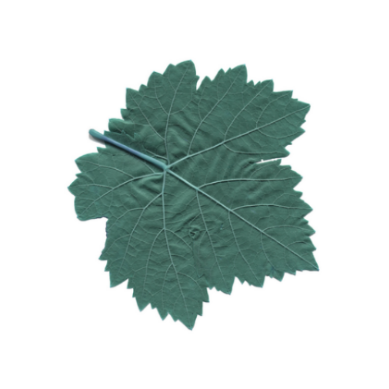

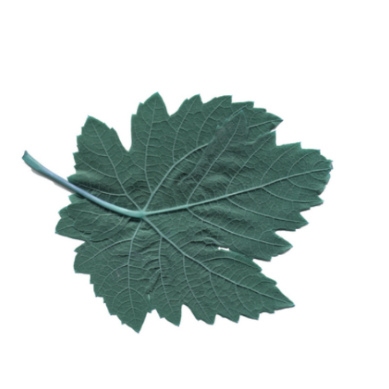

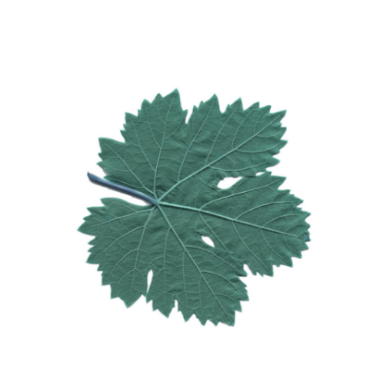

In [ ]:
for i in range(3):

  plt.imshow(test_data[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

5/5 [==============================] - 9s 569ms/step


In [ ]:
predicted_classes

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 3, 2, 2, 2, 3,
       2, 3, 2, 2, 0, 2, 4, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 1, 3, 2, 2,
       1, 3, 3, 2, 4, 3, 2, 3, 0, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 2,
       4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
filesnames_without_extenstion= [filename.replace(".png","" )for filename in os.listdir(DATASET_DIR)]
pred={
    'ID':os.listdir(DATASET_DIR),
    'label':predicted_classes
}

submit=pd.DataFrame(pred)
submit.head()

,ID,label
0,image4.png,0
1,image29.png,0
2,image7.png,0
3,image28.png,0
4,image13.png,3


In [ ]:
submit.tail()

,ID,label
145,image150.png,4
146,image136.png,4
147,image130.png,4
148,image144.png,4
149,image149.png,4


In [ ]:
submit.to_csv('nadine-inceptionResnet.csv',index=False)